In [3]:
import qrcode
from IPython.display import Image
from PIL import Image, ImageDraw, ImageFont

In [15]:
def makeQR(count, side, outdir):
        code = "mDOM_{}-{:03d}".format(side, count)
        img_path = f"{outdir}/{code}.png"
        img = qrcode.make(code)
        img.save(img_path)
        return code, img_path

def addText(code, img_path):
        # Open the saved image
        qr_image = Image.open(img_path)

        # Create a new image with enough space to add text below the QR code
        new_image = Image.new('RGB', (qr_image.width, qr_image.height + 30), color=(255, 255, 255))

        # Paste the QR code image onto the new image
        new_image.paste(qr_image, (0, 0))

        # Add text under the QR code image
        draw = ImageDraw.Draw(new_image)
        font = ImageFont.load_default()  # You can change the font if needed
        font = ImageFont.truetype('/usr/share/sphinx_rtd_theme/static/fonts/Lato-Bold.ttf', 28)
        draw.text((10, qr_image.height), code, fill=(0, 0, 0), font=font)

        # Save the new image with text
        new_image.save(img_path)

In [16]:
if __name__ == "__main__":
    # number of half modules
    for count in range(500, 710):
        for side in ["top", "bot"]:
            #make qr code
            code, img_path = makeQR(count, side, outdir="qrcodes/")
            #edit qr code text
            addText(code, img_path)
            
    print("QR codes generated and saved successfully.")

QR codes generated and saved successfully.


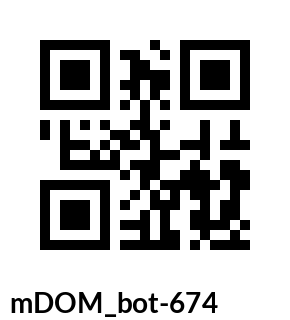

In [21]:
Image.open("/home/victoria/work/icecube/service/mDOM_logging/mdom/qr_repo/qrcodes/mDOM_bot-674.png")